<div dir="rtl">
<li>نام و نام خانودگی : امیرحسین جراره</li>
<li>شماره دانشجویی : 400616004 </li>
<li>عنوان پروژه : پیاده سازی درخت تصمیم برای کلاس بندی </li>
<li>نام استاد : دکتر عبدی هجراندوست </li>
</div>

<div dir="rtl">
  <h1>پروژه درخت تصمیم کلاس بندی (Classification)</h1>
  <p>
    ابتدا همه ی دیتاست ها و فایل های نصبی لازم را برای نصب پکیج های پایتون از گیتهاب شخصی اینجانب برای پروژه درخت تصمیم دریافت می کنیم.همچنین برای اجرای هرچه بهتر پروژه بهتر است از محیط گوگل کلب استفاده نمایید.
  </p>
  
  
  <b> توجه : برای استفاده کافیست که در محیط گوگل کلب فقط سلول ها را اجرا نمایید ، همه ی پیشنیاز ها و دانلود ها خود انجام خواهند شد و احتیاج به هیچ فرآیند جانبی نمی باشد</b>

  <h3>موارد اجرا شده در این دستورالعمل و کد</h3>
  <li>پیاده سازی دستی درخت تصمیم مطابق با الگوریتم مطرح شده در کلاس</li>

  <li>پیاده سازی دستی اگوریتم PCA</li>
  <li>رسم و نمایش تمام موارد خواسته شده برای درخت تصمیم</li>
  <li>پیاده سازی اگوریتم T-SNE </li>
  <li>پیاده سازی اگوریتم K-FOLD برای cross validation </li>
  <li>بررسی نتایج فوق در انتها </li>
</div>


In [38]:
# remove and install defualt package , just use inn google colab
%cd /content/
!rm -rf * #remove defualt folders and file in google colab
!apt install git -y #install git

/content
Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.17.1-1ubuntu0.13).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [39]:
# clone dataset and requirment files and install python packages
%cd /content/
!git clone https://github.com/amirjarareh/dt_classification

%mv /content/dt_classification/* /content/
%rm -rf /content/dt_classification/
!unzip mnist_dataset.zip
%rm /content/mnist_dataset.zip
!pip install -r requirment.txt

/content
Cloning into 'dt_classification'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
Archive:  mnist_dataset.zip
  inflating: train-images.idx3-ubyte  
  inflating: train-labels.idx1-ubyte  
  inflating: t10k-images.idx3-ubyte  
  inflating: t10k-labels.idx1-ubyte  
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<div dir="rtl">
  <h2>لود کردن دیتاست</h2>
  <p>
در این بخش دیتاست را برای تفکیک به دو داده ی آموزش و تست که تقسیم شده است در متغیر های مورد نظر ذخیره می کنیم
  </p>
</div>

In [40]:
import idx2numpy

#load train dataset
x_train = idx2numpy.convert_from_file('train-images.idx3-ubyte')
x_train = x_train.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

#load test dataset
x_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
x_test =  x_test.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [41]:
print(" x train data: {0} \n y train data : {1} \n x test data : {2} \n y test data : {3}".format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

 x train data: (60000, 784) 
 y train data : (60000,) 
 x test data : (10000, 784) 
 y test data : (10000,)


<div dir="rtl">
  <h3>بررسی دیتاست</h3>
  <p>
با استفاده از کتابخانه matplotlib به بررسی و نمایش برخی از تصاویر دیتاست می پردازیم. توجه فرمایید که در محیط کلب کتابخانه opencv تصاویر را نمایش نمی دهد.
  </p>
</div>

In [42]:
import seaborn
import math
import matplotlib
import matplotlib.pyplot as plt
#for show image in google-colab terminal
%matplotlib inline

def image_dispaly(image,label):
    image = image.reshape(28,28)
    # seaborn.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False)
    seaborn.heatmap(image,linewidth=0,xticklabels=False,yticklabels=False,cmap=seaborn.cubehelix_palette(as_cmap=True))

    plt.title("label = {}".format(label))
    plt.show()

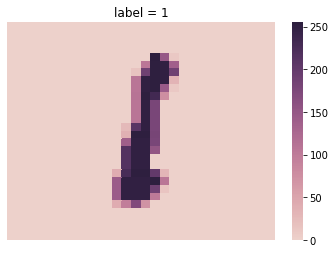

...


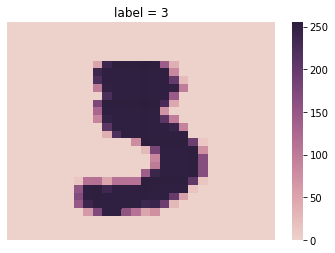

In [43]:
#display custom images
# for train data
pic_number = 450
image_dispaly(x_train[pic_number],y_train[pic_number])
print('...')
# for test data
pic_number = 450
image_dispaly(x_test[pic_number],y_test[pic_number])



<div dir="rtl">
  <h2>ساخت درخت تصمیم</h2>
  <p>
مطابق با مباحث مطرح شده در کلاس و شبه کد بیان شده در اسلاید ها به پیاده سازی درخت تصمیم می پردازیم با توجه به اینکه الگوریتم مطرح شده ریکیرسیو یا بازگشتی می باشد از ساختار کلاس در پایتون استفاده می نماییم . برای این منظور ابتدا یک کلاس گره درست کرده و سپس درخت مورد نظر خود را متناسب با آن تشکیل می دهیم ، با توجه به اینکه نمی توان درمحیط ژوپیتر و یا گوگل کلب نمی توان کلاس را تکه کرد و مستقلا توضیح داد در بالای هر توضیح مختصری راجع به آن فانکشن را بیان می کنیم.توجه فرمایید که اگر نامگذاری ها را متناسب با پکیج scikit learn انجام دهیم می توانیم از فانکشن های متناظر با آن نیز استفاده نماییم.
  </p>
  <
  <b>
  برای ساخت درخت مطابق با روند زیر عمل می کنیم.

  <li>ساخت کلاس درخت و نود اصلی برای کلیت درخت</li>
  <li>ساخت تابع fit شبیه پکیج scikit learn  و فراخوانی فانکشن train</li>
  <li>نوشتن تابع یازگشتی Decision_Tree_Learning </li>
  <li>نوشتن تابع یازگشتی importance برای پیدا کردن بهترین ویژگی </li>

  <li>محاسبه آنتروپی در فانکشن entropy</li>
  <li>محاسبه مقدار برگ با استفاده میانه یا میانگین تعیین شده توسط کاربر</li>
  </b>
</div>

In [44]:
import numpy as np
class Decision_Tree_Classification():
  def __init__(self, max_depth=2):      
    # initialize the root of the tree 
    self.root = None
    self.max_depth = max_depth
  #class node for tree
  class Node():
    def __init__(self, feature_index=None, threshold=None,
                left=None, right=None, info_gain=None, value=None):
      self.feature_index = feature_index
      self.threshold = threshold
      self.left = left
      self.right = right
      self.info_gain = info_gain
      self.value = value

  #create tree 
  def Decision_Tree_Learning(self, dataset, depth=0):
      
    X, Y = dataset[:,:-1], dataset[:,-1]
    num_samples, num_features = np.shape(X)
    
    if num_samples>=2 and depth<=self.max_depth:
      importance_features = self.Importance(dataset, num_samples, num_features)
      if importance_features[4]>0:
        l_tree = self.Decision_Tree_Learning(importance_features[2], depth+1)
        r_tree = self.Decision_Tree_Learning(importance_features[3], depth+1)
        return self.Node(importance_features[0], importance_features[1], 
                    l_tree, r_tree, importance_features[4])
    Y = list(Y)
    return self.Node(value=max(Y, key=Y.count))
  
  #select best feature from dataset
  def Importance(self, dataset, num_samples, num_features):
    importance = []
    max_info_gain = -float("inf")
    i = 0
    while i < num_features:
      tr_main = np.unique(dataset[:,i])
      for tr in tr_main:
        dataset_left = np.array([row for row in dataset if row[i]<=tr])
        dataset_right = np.array([row for row in dataset if row[i]>tr])
        if len(dataset_left)>0 and len(dataset_right)>0:
          y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
          w_l = (len(left_y) / len(y))
          w_r = (len(right_y) / len(y))
          currnt_info_gain = self.entropy(y) - (w_l*self.entropy(left_y) + w_r*self.entropy(right_y))
          if currnt_info_gain>max_info_gain:
            importance = []
            importance.extend([i,tr,
                                dataset_left,dataset_right,
                                currnt_info_gain])
            max_info_gain = currnt_info_gain
      i += 1           
    return importance
  
  # entropy function for importance function
  def entropy(self, y):
    lbl = np.unique(y)
    entropy = 0
    for data in lbl:
      p = len(y[y == data]) / len(y)
      entropy += -p * np.log2(p)
    return entropy

  #get data and call tree learning
  def fit(self, X, Y):        
    dataset = np.concatenate((X, Y), axis=1)
    self.root = self.Decision_Tree_Learning(dataset)
  
  #predict data from train or test or real data
  def predict(self, X):        
    preditions = [self.prediction_sample_data(x, self.root) for x in X]
    return preditions
  # prediction sample data for predict function
  def prediction_sample_data(self, x, tree):
    if tree.value!=None:
       return tree.value
    feature_val = x[tree.feature_index]
    if feature_val<=tree.threshold:
        return self.prediction_sample_data(x, tree.left)
    else:
        return self.prediction_sample_data(x, tree.right)

  #show tree same sklearn.export_text
  def export_text(self, tree=None, ind="-"):
    if not tree:
      tree = self.root
    if tree.value is not None:
      print(tree.value)
    else:
      print("X_"+str(tree.feature_index), "<=", tree.threshold)
      print("{}left:".format(ind), end="")
      ind2 = ind + ind
      self.export_text(tree.left, ind2)
      print("{}right:".format(ind), end="")
      self.export_text(tree.right, ind2)

<div dir="rtl">
  <h3>تست و بررسی درستی درخت تصمیم </h3>
  <p>
برای بررسی درخت ابتدا یک دیتا دو بعدی ساده قابل حدس به درخت می دهیم و خروجی را ارزیابی می کنیم . در این بخش می توانیم آن را معادل دیتای رستوران در نظر بگیریم. همانطور که در زیر می بینید درخت به درستی عمل می کند
  </p>
</div>

In [45]:
#prepair data for validate tree
x_train_set = [[1,2],[4,5],[7,8],       #class 0
               [10,13],[14,12],[16,11]] #class 1
y_train_set = [[0],[0],[0],[1],[1],[1]]

x_test_set = [[3,7],[4,2] ,             #class 0
              [9,13],[10,17]]           #class 1
y_test_set = [0,0,1,1]

In [46]:
#initial tree and fit data
dtc = Decision_Tree_Classification(max_depth=5)
dtc.fit(x_train_set,y_train_set)
#print tree
dtc.export_text()

X_0 <= 7
-left:0
-right:1


In [47]:
from sklearn.metrics import accuracy_score

y_prd = dtc.predict(x_test_set)
accuracy_score(y_test_set,y_prd )

1.0

<div dir="rtl">
  <h3>
  پیاده سازی الگوریتم K-FOLD برای cross validation
  </h3>
  <p>
  الگوریتم k-fold را برای استفاده از cross validation در این قسمت طراحی می کنیم. سلول اول وظیقه ی تقسیم داده ها را به k قسمت را دارد و الگوریتم دوم و دریافت درخت به تخمین تابع می پردازد و score ها را برای حالت های مختلف حساب می کند.
  </p>
</div>

In [48]:
# convert to cv to 3 files
def preprocess_k_fold_data(x,y,cv = 3):
  len_feature = len(x)
  x_train_all = list(x)
  y_train_all = list(y)
  cv_cnt = 0
  k_fold_cnt = 0
  x_out = []
  y_out = []

  for i in range(cv):
    x_out.append([])
    y_out.append([])

  for i in range(len_feature):
    x_buffer = x_train_all[i]
    y_buffer = y_train_all[i]
    x_out[cv_cnt].append(x_buffer)
    y_out[cv_cnt].append(y_buffer)
    k_fold_cnt +=1
    if k_fold_cnt == int(len_feature/cv):
      cv_cnt +=1
      k_fold_cnt =0

    if cv_cnt >= cv:
      break 
      
  return x_out,y_out

In [49]:
from sklearn.metrics import accuracy_score

def cross_validation(dtc, x, y,cv=3):
  x ,y = preprocess_k_fold_data(x,y,cv=num_cv)
  scores = []
  for i in range(cv):
    x_train_cv ,y_train_cv ,x_test_cv ,y_test_cv = [],[],[],[]
    for j in range(len(x)):
      if i == j:
        x_train_cv += x[j]
        y_train_cv += y[j]
      else:
        x_test_cv += x[j]
        y_test_cv += y[j]

    dtc.fit(x_train_cv,y_train_cv)

    y_pred = dtc.predict(x_test_cv) 
    score = accuracy_score(y_test_cv, y_pred)
    scores.append(score)
  return scores

<div dir="rtl">
  <h3>ارزیابی درخت تصمیم بر روی دیتاست mnist</h3>
  <p>
  حال به بررسی درخت تصمیم برای موارد مطرح شده در تمرین می پردازیم 
  </p>
</div>

In [50]:
#prepair data for train
def prepair_dataset(x,y,num):
  data_x = []
  data_y = []
  for i in range(num):
    data_x.append(list(x[i]))
    data_y.append([y[i]])
  
  return data_x,data_y

In [51]:
num_train = 200
x_for_train,y_for_train = prepair_dataset(x_train,y_train,num_train)

In [52]:
import time

t1 = time.time()
#inital and fit dt
dtc = Decision_Tree_Classification(max_depth=5)
dtc.fit(x_for_train,y_for_train)

#calculate dt time process
print("process time is {} seconds".format((time.time()- t1)))

process time is 35.91773867607117 seconds


In [53]:
dtc.export_text()

X_402 <= 10
-left:X_378 <= 0
--left:X_184 <= 0
----left:X_217 <= 125
--------left:7
--------right:4
----right:X_455 <= 15
--------left:X_155 <= 250
----------------left:2
----------------right:7
--------right:0
--right:X_326 <= 162
----left:X_490 <= 40
--------left:X_158 <= 0
----------------left:X_466 <= 5
--------------------------------left:2
--------------------------------right:3
----------------right:X_211 <= 245
--------------------------------left:8
--------------------------------right:5
--------right:X_406 <= 203
----------------left:X_214 <= 0
--------------------------------left:5
--------------------------------right:9
----------------right:1
----right:X_625 <= 50
--------left:X_433 <= 204
----------------left:9
----------------right:2
--------right:X_187 <= 0
----------------left:7
----------------right:8
-right:X_182 <= 18
--left:X_567 <= 0
----left:X_237 <= 23
--------left:X_123 <= 0
----------------left:4
----------------right:X_95 <= 0
--------------------------------

predict = [6] 
 --------------


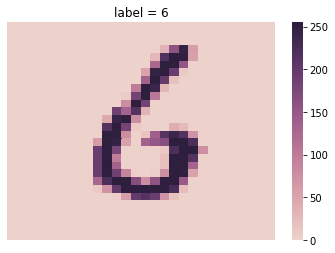

In [54]:
pic_number = 50

x_prd = list(x_test[pic_number])
y_prd = dtc.predict([x_prd])
print("predict = {} \n --------------".format(y_prd))
image_dispaly(x_test[pic_number],y_test[pic_number])

<div dir="rtl">
  <h3>محاسبه ماتریس درهمریختگی دقت (Accuracy Score) و Recall و precision  یه همراه رسم نمودار ROC و AUC با داده های آموزش و تست درخت تصمیم</h3>
  <p>
  </p>
</div>

------ train data validation ------
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      0.96      0.98        26
           2       0.95      1.00      0.98        20
           3       0.95      1.00      0.98        21
           4       1.00      1.00      1.00        21
           5       0.92      0.92      0.92        13
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        21
           8       0.93      0.93      0.93        15
           9       0.96      0.96      0.96        23

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.98      0.97      0.98       200

----confusion Matrix for train data ----


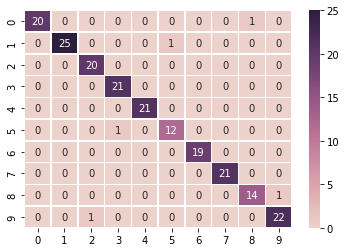

In [55]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

num_test = len(x_test)
x_for_test , _ = prepair_dataset(x_test,y_test,num_test)
y_pred = dtc.predict(x_for_test)

y_train_acc_and_cm = y_train[0:num_train:1]
y_train_pred = dtc.predict(x_for_train)

log_train = classification_report(y_train_acc_and_cm,y_train_pred)
print("------ train data validation ------")
print(log_train)

print("----confusion Matrix for train data ----")
confusionMatrix_train = confusion_matrix(y_train_acc_and_cm, y_train_pred)
confusionMatrix_train = seaborn.heatmap(confusionMatrix_train,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))


------ test data validation ------
              precision    recall  f1-score   support

           0       0.57      0.62      0.59       980
           1       0.77      0.82      0.80      1135
           2       0.34      0.33      0.34      1032
           3       0.47      0.32      0.38      1010
           4       0.55      0.61      0.58       982
           5       0.36      0.25      0.29       892
           6       0.47      0.58      0.52       958
           7       0.51      0.59      0.54      1028
           8       0.25      0.22      0.23       974
           9       0.34      0.38      0.36      1009

    accuracy                           0.48     10000
   macro avg       0.46      0.47      0.46     10000
weighted avg       0.47      0.48      0.47     10000

----confusion Matrix for test data ----


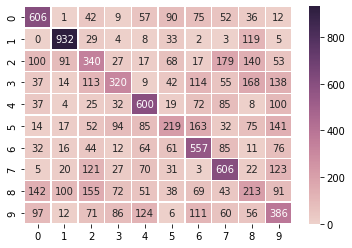

In [56]:
log_test = classification_report(y_test,y_pred)
print("------ test data validation ------")
print(log_test)

print("----confusion Matrix for test data ----")
confusionMatrix_test = confusion_matrix(y_test, y_pred)
confusionMatrix_test = seaborn.heatmap(confusionMatrix_test,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))

In [57]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

def plot_roc_auc(y,y_pred):
  #calculate the fpr and tpr for all thresholds of the classification
  fpr, tpr, threshold = metrics.roc_curve(y,y_pred, pos_label=1)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

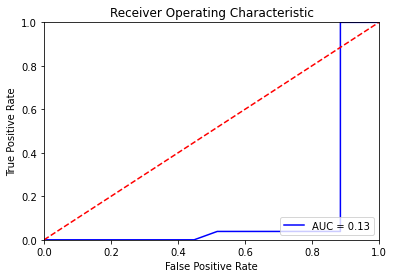

In [58]:
plot_roc_auc(y_train_acc_and_cm,y_train_pred)

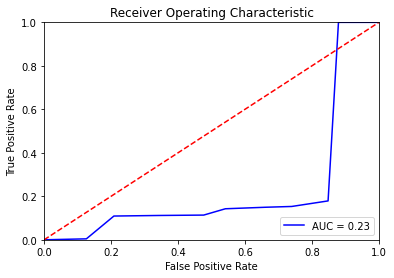

In [59]:
plot_roc_auc(y_test, y_pred)

<div dir="rtl">
  <h3>cross validation برای درخت کامل</h3>
  <p>
  الگوریتم k-fold را برای 3 ،5  ،7 ، 10 به کار می بریم.ابتدا درخت را تعریف می کنیم و سپس برای هر k دلخوه score های آن را نمایش می دهیم.
  </p>
</div>

In [60]:
dtc = Decision_Tree_Classification(max_depth=5)

In [61]:
# for k = 3
num_cv = 3
scores = cross_validation(dtc,x_for_train,y_for_train,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 3 :

[0.4621212121212121, 0.5, 0.4772727272727273]


In [62]:
# for k = 5
num_cv = 5
scores = cross_validation(dtc,x_for_train,y_for_train,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 5 :

[0.29375, 0.3375, 0.41875, 0.36875, 0.3375]


In [63]:
# for k = 7
num_cv = 7
scores = cross_validation(dtc,x_for_train,y_for_train,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 7 :

[0.30952380952380953, 0.27976190476190477, 0.32142857142857145, 0.34523809523809523, 0.4107142857142857, 0.35714285714285715, 0.27380952380952384]


In [64]:
# for k = 10
num_cv = 10
scores = cross_validation(dtc,x_for_train,y_for_train,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 10 :

[0.34444444444444444, 0.35555555555555557, 0.17777777777777778, 0.3111111111111111, 0.2611111111111111, 0.34444444444444444, 0.37222222222222223, 0.3, 0.2222222222222222, 0.19444444444444445]


<div dir="rtl">
  <h3>
  بررسی درخت تولید شده با پکیج آماده scikit_learn
  </h3>
  <p>
  در این قسمت از پکیج آماده sklearn.tree برای بررسی درخت تصمیم و نحوه درستی و دقیت عملکرد بهره می بریم .
  </p>
</div>

In [65]:
from sklearn import tree
from sklearn.model_selection import cross_val_predict

X_Train = x_train[0:num_train:1]
Y_Train = y_train[0:num_train:1]

dt_clf = tree.DecisionTreeClassifier(max_depth = 10,criterion="entropy",min_samples_split=2)
dt_clf.fit(X_Train, Y_Train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)



<div dir="rtl">
  <h3>
  </h3>
  <p>
محاسبه ماتریس درهمریختگی دقت (Accuracy Score) و Recall و precision یه همراه رسم نمودار ROC و AUC با داده های آموزش و تست درخت تصمیم با پکیج آماده sklearn.tree

  </p>
</div>

------ train data validation sklearn.tree ------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00        19
           7       1.00      1.00      1.00        21
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        23

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

----confusion Matrix for train data ----


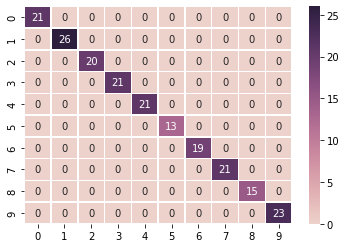

In [66]:
from sklearn.metrics import classification_report

y_train_pred = dt_clf.predict(X_Train)
y_test_pred = dt_clf.predict(x_test)

log_train = classification_report(Y_Train, y_train_pred)
print("------ train data validation sklearn.tree ------")
print(log_train)

print("----confusion Matrix for train data ----")
confusionMatrix_train = confusion_matrix(Y_Train, y_train_pred)
confusionMatrix_train = seaborn.heatmap(confusionMatrix_train,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))

------ test data validation sklearn.tree ------
              precision    recall  f1-score   support

           0       0.59      0.63      0.61       980
           1       0.73      0.81      0.77      1135
           2       0.48      0.46      0.47      1032
           3       0.56      0.41      0.47      1010
           4       0.54      0.68      0.60       982
           5       0.32      0.22      0.26       892
           6       0.43      0.50      0.46       958
           7       0.60      0.62      0.61      1028
           8       0.30      0.18      0.22       974
           9       0.33      0.44      0.38      1009

    accuracy                           0.50     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.50      0.49     10000

----confusion Matrix for test data in sklearn.tree ----


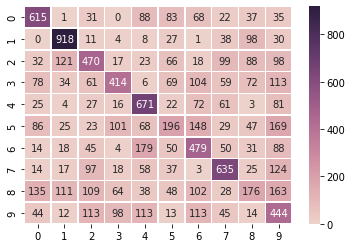

In [67]:
log_test = classification_report(y_test, y_test_pred)
print("------ test data validation sklearn.tree ------")
print(log_test)

print("----confusion Matrix for test data in sklearn.tree ----")
confusionMatrix_train = confusion_matrix(y_test, y_test_pred)
confusionMatrix_train = seaborn.heatmap(confusionMatrix_train,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))

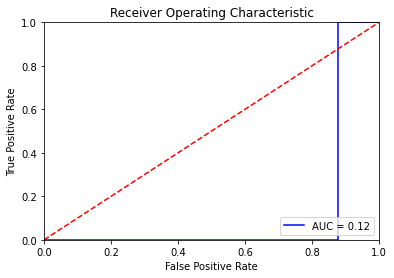

In [68]:
plot_roc_auc(Y_Train, y_train_pred)

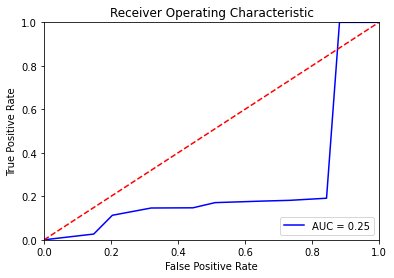

In [69]:
plot_roc_auc(y_test, y_test_pred)

<div dir="rtl">
  <h3>پیاده سازی الگوریتم PCA</h3>
  <p>
 برای پیاده سازی الگوریتم PCA مطابق با دستورالعمل مطرح شده در تمرین عمل می کنیم.  
  </p>

    
  <p>
  <h6>روش PCA : </h6>
  PCA ابتدا ابرصفحه‌ای رو که در نزدیک‌ترین فاصله با داده‌ها قرار دارد شناسایی می کند سپس داده‌ها را به آن تصویر میکنه.
  منطقیست که محورهایی را انتخاب کنیم که بیشترین مقدار واریانس رو حفظ کند و به نسبت بقیه تصویرها، اطلاعات کمتری را از دست خواهیم داد. یک راه دیگر برای توجیه این انتخاب اینست که این محور محوری هست که فاصله‌ی میانگین مربعات را بین مجموعه‌ی داده‌ی اصلی و تصویر را به حداقل می رساند.

</p>
</div>

In [70]:
from numpy import mean,std,cov
from numpy.linalg import eig
import scipy.linalg as la
import numpy as np
import pandas


class PCA:
    def __init__(self, n_components=None, whiten=False):
        self.n_components = n_components
        self.whiten = bool(whiten)

    def fit(self, X):
        r,c = X.shape
        self.mn = mean(X,axis=0)
        X = X - self.mn
        if self.whiten:
            self.stdv = std(X,axis=0)
            X = X/self.stdv
        A = np.array(X)
        C = cov(A.T)  
        self.eigval, self.eigvect = eig(C)

        if self.n_components is not None:
            self.eigval = self.eigval[:self.n_components]
            self.eigvect = self.eigvect[:, :self.n_components]

        desc_ord = np.flip(np.argsort(self.eigval))
        self.eigval = self.eigval[desc_ord]
        self.eigvect = self.eigvect[:, desc_ord]
        
        return self

    def transform(self, X):
         X = X - self.mn
         
         if self.whiten:
             X = X/self.stdv
         return (X @ self.eigvect).astype(int)  

    @property
    def variance_ratio(self):
        return (self.eigval/np.sum(self.eigval))*100   

<div dir="rtl">
  <h4>کاهش ابعاد به 250 ویژگی با الگوریتم PCA</h4>
  <p>
 در این مرحله خروجی را به 250 ویژگی کاهش می دهیم 
  </p>
</div>

In [71]:
# use PCA to decomposition dim of array and futures 
n_future = 250
pca = PCA(n_components= n_future)
# Fit the PCA on the training set
pca.fit(x_train)
#transorm data from 724 to 250
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

x_for_train_pca,y_for_train_pca = prepair_dataset(x_train_pca,y_train,num_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: ComplexWarning: Casting complex values to real discards the imaginary part


In [72]:
import time

t1 = time.time()
#inital and fit dt
dtc = Decision_Tree_Classification(max_depth=5)
dtc.fit(x_for_train_pca,y_for_train_pca)
#calculate dt time process
print("process time is {} seconds".format((time.time()- t1)))

process time is 46.3893256187439 seconds


------ train data validation ------
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.93      0.96      0.94        26
           2       0.67      1.00      0.80        20
           3       1.00      0.86      0.92        21
           4       1.00      0.90      0.95        21
           5       0.93      1.00      0.96        13
           6       1.00      0.89      0.94        19
           7       1.00      1.00      1.00        21
           8       0.80      0.80      0.80        15
           9       0.91      0.87      0.89        23

    accuracy                           0.91       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.93      0.91      0.91       200

----confusion Matrix for train data ----


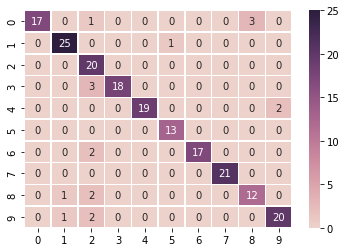

In [73]:
from sklearn.metrics import classification_report

#predection train dataset
y_train_pca = y_train[0:num_train:1]
y_train_pred_pca = dtc.predict(x_for_train_pca)

log_train_pca_250 = classification_report(y_train_pca,y_train_pred_pca)
print("------ train data validation ------")
print(log_train_pca_250)

print("----confusion Matrix for train data ----")
confusionMatrix_train = confusion_matrix(y_train_pca,y_train_pred_pca)
confusionMatrix_train = seaborn.heatmap(confusionMatrix_train,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       980
           1       0.90      0.89      0.90      1135
           2       0.35      0.54      0.42      1032
           3       0.36      0.49      0.42      1010
           4       0.65      0.65      0.65       982
           5       0.48      0.20      0.29       892
           6       0.58      0.52      0.55       958
           7       0.55      0.53      0.54      1028
           8       0.48      0.24      0.31       974
           9       0.37      0.49      0.42      1009

    accuracy                           0.52     10000
   macro avg       0.54      0.52      0.51     10000
weighted avg       0.54      0.52      0.52     10000

----confusion Matrix for test data ----


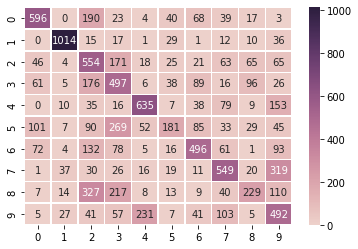

In [74]:
from sklearn.metrics import classification_report

#predection test dataset
y_train_pca = y_train[0:num_train:1]
y_train_pred_pca = dtc.predict(x_for_train_pca)

x_for_test_pca,_ = prepair_dataset(x_test_pca,y_test,len(x_test_pca))
y_test_pred_pca = dtc.predict(x_for_test_pca)
log_test_pca_250 = classification_report(y_test,y_test_pred_pca)

print(log_test_pca_250)

print("----confusion Matrix for test data ----")
confusionMatrix_train = confusion_matrix(y_test,y_test_pred_pca)
confusionMatrix_train = seaborn.heatmap(confusionMatrix_train,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))

plot roc and auc for pca with 250 feature train data 



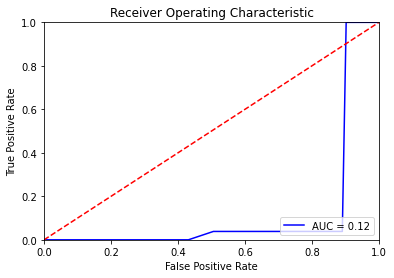

In [75]:
print("plot roc and auc for pca with {} feature train data \n".format(n_future))
plot_roc_auc(y_train_pca,y_train_pred_pca)

plot roc and auc for pca with 250 feature test data 



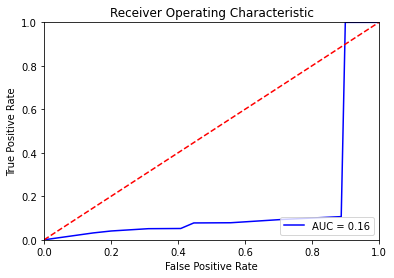

In [76]:
print("plot roc and auc for pca with {} feature test data \n".format(n_future))
plot_roc_auc(y_test,y_test_pred_pca)

<div dir="rtl">
  <h3>cross validation برای درخت کاهش یافته به 250 ویژگی</h3>
  <p>
  الگوریتم k-fold را برای 3 ،5  ،7 ، 10 به کار می بریم.ابتدا درخت را تعریف می کنیم و سپس برای هر k دلخوه score های آن را نمایش می دهیم.
  </p>
</div>

In [77]:
# for k = 3
num_cv = 3
scores = cross_validation(dtc,x_for_train_pca,y_for_train_pca,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 3 :

[0.42424242424242425, 0.32575757575757575, 0.4090909090909091]


In [78]:
# for k = 5
num_cv = 5
scores = cross_validation(dtc,x_for_train,y_for_train,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 5 :

[0.29375, 0.3375, 0.41875, 0.36875, 0.3375]


In [79]:
# for k = 7
num_cv = 7
scores = cross_validation(dtc,x_for_train,y_for_train,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 7 :

[0.30952380952380953, 0.27976190476190477, 0.32142857142857145, 0.34523809523809523, 0.4107142857142857, 0.35714285714285715, 0.27380952380952384]


In [80]:
# for k = 10
num_cv = 10
scores = cross_validation(dtc,x_for_train,y_for_train,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 10 :

[0.34444444444444444, 0.35555555555555557, 0.17777777777777778, 0.3111111111111111, 0.2611111111111111, 0.34444444444444444, 0.37222222222222223, 0.3, 0.2222222222222222, 0.19444444444444445]


<div dir="rtl">
  <h4>کاهش ابعاد به 50 ویژگی با الگوریتم PCA</h4>
  <p>
 در این مرحله خروجی را به 50 ویژگی کاهش می دهیم 
  </p>
</div>

In [81]:
# use PCA to decomposition dim of array and futures 
n_future = 50
pca = PCA(n_components= n_future)
# Fit the PCA on the training set
pca.fit(x_train)
#transorm data from 724 to 50
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

x_for_train_pca,y_for_train_pca = prepair_dataset(x_train_pca,y_train,num_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: ComplexWarning: Casting complex values to real discards the imaginary part


In [82]:
import time

t1 = time.time()
#inital and fit dt
dtc = Decision_Tree_Classification(max_depth=5)
dtc.fit(x_for_train_pca,y_for_train_pca)
#calculate dt time process
print("process time is {} seconds".format((time.time()- t1)))

process time is 10.523689270019531 seconds


------ train data validation ------
              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.93      0.96      0.94        26
           2       0.68      0.95      0.79        20
           3       1.00      0.86      0.92        21
           4       1.00      0.90      0.95        21
           5       0.81      1.00      0.90        13
           6       1.00      0.89      0.94        19
           7       1.00      1.00      1.00        21
           8       0.80      0.80      0.80        15
           9       0.91      0.87      0.89        23

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.92      0.91      0.91       200

----confusion Matrix for train data ----


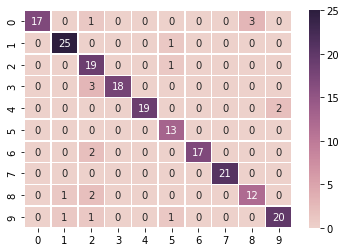

In [83]:
from sklearn.metrics import classification_report

#predection train dataset
y_train_pca = y_train[0:num_train:1]
y_train_pred_pca = dtc.predict(x_for_train_pca)

log_train_pca_50 = classification_report(y_train_pca,y_train_pred_pca)
print("------ train data validation ------")
print(log_train_pca_50)

print("----confusion Matrix for train data ----")
confusionMatrix_train = confusion_matrix(y_train_pca,y_train_pred_pca)
confusionMatrix_train = seaborn.heatmap(confusionMatrix_train,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))

              precision    recall  f1-score   support

           0       0.67      0.61      0.64       980
           1       0.93      0.82      0.87      1135
           2       0.36      0.57      0.44      1032
           3       0.36      0.49      0.42      1010
           4       0.64      0.65      0.65       982
           5       0.46      0.21      0.28       892
           6       0.58      0.52      0.55       958
           7       0.55      0.56      0.56      1028
           8       0.55      0.24      0.34       974
           9       0.37      0.50      0.42      1009

    accuracy                           0.52     10000
   macro avg       0.55      0.52      0.52     10000
weighted avg       0.55      0.52      0.52     10000

----confusion Matrix for test data ----


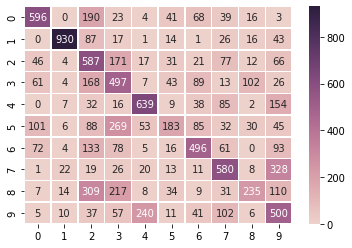

In [84]:
from sklearn.metrics import classification_report

#predection test dataset
y_train_pca = y_train[0:num_train:1]
y_train_pred_pca = dtc.predict(x_for_train_pca)

x_for_test_pca,_ = prepair_dataset(x_test_pca,y_test,len(x_test_pca))
y_test_pred_pca = dtc.predict(x_for_test_pca)
log_test_pca_50 = classification_report(y_test,y_test_pred_pca)

print(log_test_pca_50)

print("----confusion Matrix for test data ----")
confusionMatrix_train = confusion_matrix(y_test,y_test_pred_pca)
confusionMatrix_train = seaborn.heatmap(confusionMatrix_train,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))

plot roc and auc for pca with 50 feature train data 



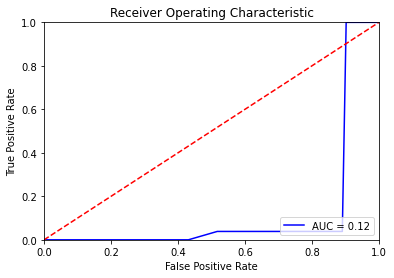

In [85]:
print("plot roc and auc for pca with {} feature train data \n".format(n_future))
plot_roc_auc(y_train_pca,y_train_pred_pca)

plot roc and auc for pca with 50 feature test data 



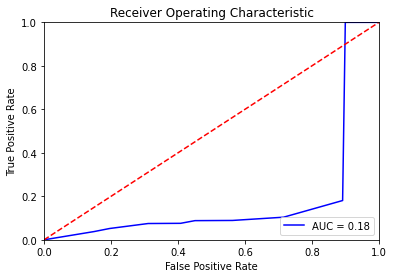

In [86]:
print("plot roc and auc for pca with {} feature test data \n".format(n_future))
plot_roc_auc(y_test,y_test_pred_pca)

<div dir="rtl">
  <h3>cross validation برای درخت کاهش یافته به 50 ویژگی</h3>
  <p>
  الگوریتم k-fold را برای 3 ،5  ،7 ، 10 به کار می بریم.ابتدا درخت را تعریف می کنیم و سپس برای هر k دلخوه score های آن را نمایش می دهیم.
  </p>
</div>

In [88]:
# for k = 3
num_cv = 3
scores = cross_validation(dtc,x_for_train_pca,y_for_train_pca,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 3 :

[0.5454545454545454, 0.3939393939393939, 0.3939393939393939]


In [89]:
# for k = 5
num_cv = 5
scores = cross_validation(dtc,x_for_train,y_for_train,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 5 :

[0.29375, 0.3375, 0.41875, 0.36875, 0.3375]


In [90]:
# for k = 7
num_cv = 7
scores = cross_validation(dtc,x_for_train,y_for_train,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 7 :

[0.30952380952380953, 0.27976190476190477, 0.32142857142857145, 0.34523809523809523, 0.4107142857142857, 0.35714285714285715, 0.27380952380952384]


In [91]:
# for k = 10
num_cv = 10
scores = cross_validation(dtc,x_for_train,y_for_train,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 10 :

[0.34444444444444444, 0.35555555555555557, 0.17777777777777778, 0.3111111111111111, 0.2611111111111111, 0.34444444444444444, 0.37222222222222223, 0.3, 0.2222222222222222, 0.19444444444444445]


<div dir="rtl">
  <h4>کاهش ابعاد به 10 ویژگی با الگوریتم PCA</h4>
  <p>
 در این مرحله خروجی را به 10 ویژگی کاهش می دهیم 
  </p>
</div>

In [92]:
# use PCA to decomposition dim of array and futures 
n_future = 10
pca = PCA(n_components= n_future)
# Fit the PCA on the training set
pca.fit(x_train)
#transorm data from 724 to 10
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

x_for_train_pca,y_for_train_pca = prepair_dataset(x_train_pca,y_train,num_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: ComplexWarning: Casting complex values to real discards the imaginary part


In [93]:
import time

t1 = time.time()
#inital and fit dt
dtc = Decision_Tree_Classification(max_depth=5)
dtc.fit(x_for_train_pca,y_for_train_pca)
#calculate dt time process
print("process time is {} seconds".format((time.time()- t1)))

process time is 2.2858095169067383 seconds


------ train data validation ------
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       1.00      0.96      0.98        26
           2       0.78      0.70      0.74        20
           3       0.77      0.81      0.79        21
           4       1.00      0.90      0.95        21
           5       0.86      0.92      0.89        13
           6       0.95      1.00      0.97        19
           7       0.95      1.00      0.98        21
           8       0.78      0.93      0.85        15
           9       0.91      0.87      0.89        23

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.89       200

----confusion Matrix for train data ----


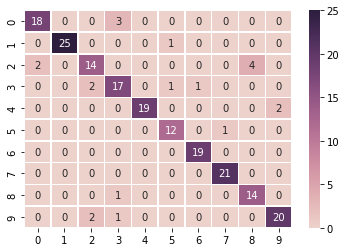

In [94]:
from sklearn.metrics import classification_report

#predection train dataset
y_train_pca = y_train[0:num_train:1]
y_train_pred_pca = dtc.predict(x_for_train_pca)

log_train_pca_10 = classification_report(y_train_pca,y_train_pred_pca)
print("------ train data validation ------")
print(log_train_pca_10)

print("----confusion Matrix for train data ----")
confusionMatrix_train = confusion_matrix(y_train_pca,y_train_pred_pca)
confusionMatrix_train = seaborn.heatmap(confusionMatrix_train,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       980
           1       0.94      0.79      0.86      1135
           2       0.47      0.50      0.49      1032
           3       0.55      0.41      0.47      1010
           4       0.72      0.50      0.59       982
           5       0.50      0.39      0.44       892
           6       0.49      0.58      0.53       958
           7       0.53      0.55      0.54      1028
           8       0.50      0.51      0.51       974
           9       0.38      0.58      0.46      1009

    accuracy                           0.56     10000
   macro avg       0.57      0.55      0.56     10000
weighted avg       0.58      0.56      0.56     10000

----confusion Matrix for test data ----


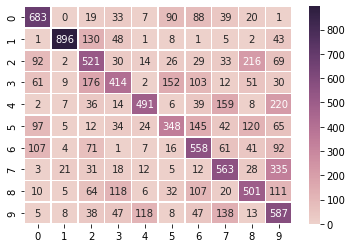

In [95]:
from sklearn.metrics import classification_report

#predection test dataset
y_train_pca = y_train[0:num_train:1]
y_train_pred_pca = dtc.predict(x_for_train_pca)

x_for_test_pca,_ = prepair_dataset(x_test_pca,y_test,len(x_test_pca))
y_test_pred_pca = dtc.predict(x_for_test_pca)
log_test_pca_50 = classification_report(y_test,y_test_pred_pca)

print(log_test_pca_50)

print("----confusion Matrix for test data ----")
confusionMatrix_train = confusion_matrix(y_test,y_test_pred_pca)
confusionMatrix_train = seaborn.heatmap(confusionMatrix_train,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))

plot roc and auc for pca with 10 feature train data 



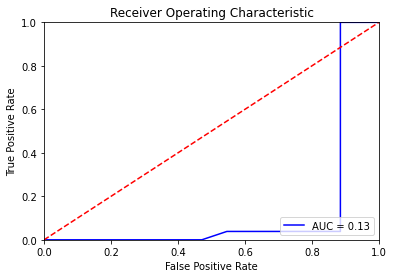

In [97]:
print("plot roc and auc for pca with {} feature train data \n".format(n_future))
plot_roc_auc(y_train_pca,y_train_pred_pca)

plot roc and auc for pca with 10 feature test data 



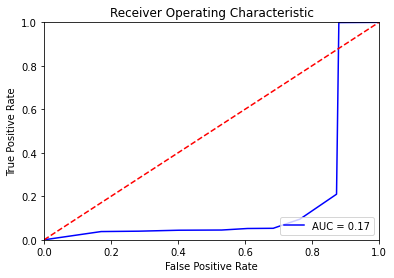

In [98]:
print("plot roc and auc for pca with {} feature test data \n".format(n_future))
plot_roc_auc(y_test,y_test_pred_pca)

<div dir="rtl">
  <h3>cross validation برای درخت کاهش یافته به 10 ویژگی</h3>
  <p>
  الگوریتم k-fold را برای 3 ،5  ،7 ، 10 به کار می بریم.ابتدا درخت را تعریف می کنیم و سپس برای هر k دلخوه score های آن را نمایش می دهیم.
  </p>
</div>

In [99]:
# for k = 3
num_cv = 3
scores = cross_validation(dtc,x_for_train_pca,y_for_train_pca,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 3 :

[0.5303030303030303, 0.3787878787878788, 0.4772727272727273]


In [100]:
# for k = 5
num_cv = 5
scores = cross_validation(dtc,x_for_train,y_for_train,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 5 :

[0.29375, 0.3375, 0.41875, 0.36875, 0.3375]


In [101]:
# for k = 7
num_cv = 7
scores = cross_validation(dtc,x_for_train,y_for_train,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 7 :

[0.30952380952380953, 0.27976190476190477, 0.32142857142857145, 0.34523809523809523, 0.4107142857142857, 0.35714285714285715, 0.27380952380952384]


In [102]:
# for k = 10
num_cv = 10
scores = cross_validation(dtc,x_for_train,y_for_train,cv = num_cv)
print( "show all scores from cross validation K = {} :\n\n{}".format(num_cv,scores))

show all scores from cross validation K = 10 :

[0.34444444444444444, 0.35555555555555557, 0.17777777777777778, 0.3111111111111111, 0.2611111111111111, 0.34444444444444444, 0.37222222222222223, 0.3, 0.2222222222222222, 0.19444444444444445]


<div dir="rtl">
  <h3>کاهش ابعاد به روش T-SNE </h3>
  <p>
در این مرحله روش T-SNE را در کنار روش PCA چک می کنیم ، همچنین نحوه ی عملکرد این روش نیز در مقاله با عنوان زیر قابل دانلود می باشد.
این مقاله با عنوان Visualizing Data using t-SNE در ژورنال ماشین لرنینیگ در سال 2008 به چاپ رسیده است.
  </p>
  </div>

  [Download Article](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)

<div dir="rtl">
  <h5>مقایسه روش PCA و T-SNE </h5>

  <h6>روش T-SNE : </h6>
  <p>
  این روش با کنار هم نگه‌داشتن نمونه‌های شبیه به هم و دور نگه‌داشتن نمونه‌های متفاوت از هم، بعد را کاهش می دهد. این روش بیشتر برای مصورسازی کاربرد دارد، مخصوصا در مصورسازی خوشه‌هایی از نمونه‌ها در فضای با ابعاد بالا
  </p>
  </div>

In [ ]:
import time
from sklearn.manifold import TSNE

n_feature = 3

X_Train = x_train[0:num_train:1]
Y_Train = y_train[0:num_train:1]

tsne = TSNE(n_iter=300,n_components=n_feature)
x_train_tsne = tsne.fit_transform(X_Train)
x_test_tsne = tsne.fit_transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
x_for_train_tsne,y_for_train_tsne = prepair_dataset(x_train_tsne,Y_Train,num_train)

In [ ]:
import time

t1 = time.time()
#inital and fit dt
dtc = Decision_Tree_Classification(max_depth=5)
dtc.fit(x_for_train_tsne,y_for_train_tsne)
#calculate dt time process
print("process time is {} seconds".format((time.time()- t1)))

process time is 0.6871812343597412 seconds


------ train data validation ------
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.50      0.69      0.58        26
           2       0.83      0.75      0.79        20
           3       0.88      0.67      0.76        21
           4       0.61      0.67      0.64        21
           5       0.53      0.69      0.60        13
           6       0.86      0.63      0.73        19
           7       1.00      0.29      0.44        21
           8       0.48      0.80      0.60        15
           9       0.63      0.74      0.68        23

    accuracy                           0.66       200
   macro avg       0.71      0.66      0.66       200
weighted avg       0.72      0.66      0.66       200

----confusion Matrix for train data ----


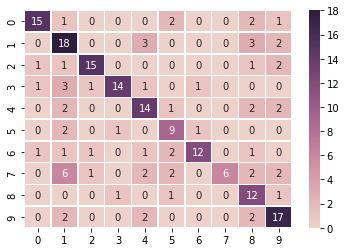

In [ ]:
from sklearn.metrics import classification_report

#predection train dataset
y_train_tsne = y_train[0:num_train:1]
y_train_pred_tsne = dtc.predict(x_for_train_tsne)

log_train_tsne = classification_report(y_train_tsne,y_train_pred_tsne)
print("------ train data validation ------")
print(log_train_tsne)

print("----confusion Matrix for train data ----")
confusionMatrix_train = confusion_matrix(y_train_tsne,y_train_pred_tsne)
confusionMatrix_train = seaborn.heatmap(confusionMatrix_train,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.29      1.00      0.45      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.31      0.56      0.40       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.01      0.01      0.01       974
           9       0.18      0.60      0.27      1009

    accuracy                           0.22     10000
   macro avg       0.08      0.22      0.11     10000
weighted avg       0.08      0.22      0.11     10000

----confusion Matrix for test data ----


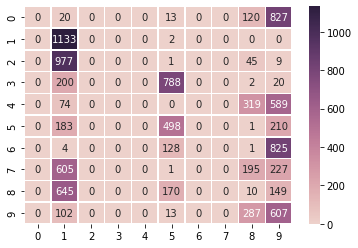

In [ ]:
from sklearn.metrics import classification_report

x_for_test_tsne,_ = prepair_dataset(x_test_tsne,y_test,len(x_test_pca))
y_test_pred_tsne = dtc.predict(x_for_test_tsne)
log_test_tsne = classification_report(y_test,y_test_pred_tsne)

print(log_test_tsne)

print("----confusion Matrix for test data ----")
confusionMatrix_train = confusion_matrix(y_test,y_test_pred_tsne)
confusionMatrix_train = seaborn.heatmap(confusionMatrix_train,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))

plot roc and auc for tsne train data 



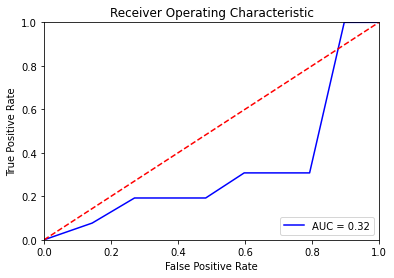

In [ ]:
print("plot roc and auc for tsne train data \n")
plot_roc_auc(y_train_tsne,y_train_pred_tsne)

plot roc and auc for tsne test data 



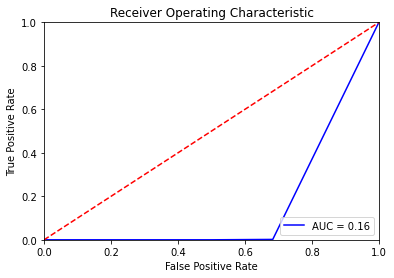

In [ ]:
print("plot roc and auc for tsne test data \n")
plot_roc_auc(y_test,y_test_pred_tsne)

<div dir="rtl">
  <h1>نتیجه گیری</h1>
  <p>
در این قسمت به چالش ها مقایسه روش های مختلف با یکدیگر و ارزیابی آن ها نسبت به یکدیگر را می پردازیم. همچنین در هر پیاده سازی درخت موارد زیر مستقلا برای داد های آموزش و تست برای هر کدام رسم یا پرینت شده اند.
  </p>
  <li> ماتریس درهمریختگی یا Confusion Matrix</li>
  <li> Accuracy Score مقدار</li>
  <li> دقت یا Precision</li>
  <li> فراخوانی یا Recall</li>
  <li> نمودار ROC </li>
  <li> نمودار AUC </li>
  

  <h3>مقایسه درخت طراحی شده با پکیج آماده</h3>
  <p>
همانطور که مشاهده کردید درخت تصمیم طراحی شده در مقایسه با درخت تصمیم آماده در پکیج scikit-learn  تقریبا عملکرد مشابهی داشتند و حتی کمی اندک پکیج طراحی شده عملکرد بهتری از خود نشان می دهد. مخصوصا زمانی که عمق درخت را افزایش می دهیم این عملکرد بهتر محصوص تر می باشد. اما سرعت درخت تصمیم در پکیج آماده در مقایسه با درخت طراحی شده قابل مقایسه نیست و بسیار سریعتر است. با تحقیقات صورت گرفته در اینترنت اگر تکرار را به ضرب ماتریسی تبدیل کنیم این سرعت به طرز معجزه آسایی افزایش خواهد یافت و علت سرعت بالای پکیج آماده نیز چنین چیزی می باشد.
  </p>


  <h3>کاهش ابعاد و عملکرد آن ها</h3>
  <p>
با کاهش ابعاد سیستم پیش بینی این بود که دقت کاهش و سرعت افزایش یابد که با نتیجه ی غیر قابل باوری رو به رو شدیم.نتیجه برای کاهش دیمانسیون سیستم به 250 با افزایش زمان در آموزش درخت تصمیم رو به رو شد که اگر درخت را ترسیم نماییم متوجه خواهیم شد که کاهش در این روش باعث شده است پیدا کردن ویژگی حیاتی برا جست و جو کمی راحتتر ولی تقسیم بندی در عمق بیشتر شود. دقت با داده های آموزشی کمی کاهش یافت ولی در داده های تست افزایش قابل توجه 10 درصدی دقت را شاهد بودیم ، البته با بیشتر شدن داده ترین دقت بدون تغییر دیمانسیون با نرخ بیشتری از PCA افزایش می باید و در نهایت از آن علور می کند. 
  </p>


  <h3>مقایسه کاهش ابعاد با PCA و TSNE</h3>
  <p>
  در روش PCA با توجه به اینکه از واریانس برای تغییر و کاهش ابعاد استفاده می نماییم و این عدد در حدود 95 درصد مشاهده می شود می بینم که عملکرد در مقایسه با روش T-SNE خیلی بهتر عمل می کند
  </p>

  <h3>استفاده از cross validation با روش K-FOLD</h3>
  <p>
  با استفاده از cross validation با روش K-FOLD که از ساده ترین روش های تقسیم می باشد می بینیم که اگر به درستی داده ها را انتخاب نماییم می توانیم خروجی مطلوبی بگیریم برای مثال در درخت اصلی دقت خروجی بر روی داده های تست به 50 درصد نمی رسد ولی اگر آن را با 3 بر حل کنیم در بر اول دقت به نسبت خوبی بر روی داده تست می رسیم.همچنین استفاده از cross validation باعث افزایش چشمگیر سرعت نسبت به درخت معمولی شده است . البته این استدلال طبیعتا با افزایش k بی اثر می شود و از جایی به یعد در نرخ داده زیاد هزینه محاسباتی را بسیار بیشتر خواهد کرد.
  </p>

  

  </div>



<div dir="rtl">
  <h1>چالش ها</h1>
  <p>
  <li>تابع importance</li>
  در درخت تصمیم چالش برانگیز ترین قسمت پیاده سازی تابع importance می باشد. که این تابع که به صورت بازگشتی در تابع آموزش درخت فراخوانی می شود علاوه بر پیچیدگی درک در ابتدا کار با ابزار ها و المان های پایتون را نیز به چالش می کشد.
  </p>

  <p>
  <li>تابع PCA</li>
  با توجه به عدم آشنایی از این تابع در کلاس و احتیاج به یادگیری فرمول ها این تابع پیاده سازی طولانی را داشت. ولی با توجه به اینکه پیاده سازی آن صرفا یک الگوریتم ریاضی می باشد چالشی به اندازه تابع انتخاب بهترین ویژگی یا importance ندارد
  </p>

  <p>
  <li>PreProcess Dataset</li>
  آماده سازی دیتا ست و تعیین ورودی و خروجی درخت متناسب با تابع های کتابخانه numpy سومین بخش چالش بر انگیز پروژه بود.
  </p>

  <p>
  <li>نمایش بصری درخت تصمیم</li>
  با توجه به اینکه نمی توان برای ترسیم درخت از پکیج آماده استفاده کرد باید فرآیند نمایش درخت را خود انجام دهیم که باعث پیچیدگی های خاص خود و استفاده از مفهوم بازگشتی را داراست.
  </p>
  </div>

<div dir="rtl">
  <h1>پشنهادات</h1>
  <p>
  <li>ذخیره سازی درخت برای جلوگیری از آموزش هرباره ی درخت که با کتابخانه sklearn-onnx قابل انجام است.</li>
همچنین برای دریافت و نمایش کده و دیتاست می توانید به گیتهاب شخصی این جانب با لینک زیر مراعه فرمایید.
</div>

[github : amirjarareh/dt_classification](https://github.com/amirjarareh/dt_classification)

